# Logistic Regression

Logistic Regression

Logistic regression is one such regression algorithm which can be used for performing classification problems. It calculates the probability that a given value belongs to a specific class. If the probability is more than 50%, it assigns the value in that particular class else if the probability is less than 50%, the value is assigned to the other class. Therefore, we can say that logistic regression acts as a binary classifier.

Working of a Logistic Model
For linear regression, the model is defined by: 𝑦=𝛽0+𝛽1𝑥 - (i)

and for logistic regression, we calculate probability, i.e. y is the probability of a given variable x belonging to a certain class. Thus, it is obvious that the value of y should lie between 0 and 1.

But, when we use equation(i) to calculate probability, we would get values less than 0 as well as greater than 1. That doesn’t make any sense . So, we need to use such an equation which always gives values between 0 and 1, as we desire while calculating the probability.

Sigmoid function
We use the sigmoid function as the underlying function in Logistic regression. Mathematically and graphically, it is shown as:


Why do we use the Sigmoid Function?

1) The sigmoid function’s range is bounded between 0 and 1. Thus it’s useful in calculating the probability for the Logistic function. 

2) It’s derivative is easy to calculate than other functions which is useful during gradient descent calculation. 

3) It is a simple way of introducing non-linearity to the model.

Although there are other functions as well, which can be used, but sigmoid is the most common function used for logistic regression. We will talk about the rest of the functions in the neural network section.

The logistic function is given as:


Let’s see some manipulation with the logistic function:


We can see that the logit function is linear in terms with x

Learning Algorithm

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
data = pd.read_csv(r"diabetes.csv") # Reading the Data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


C:\Users\kambl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kambl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kambl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

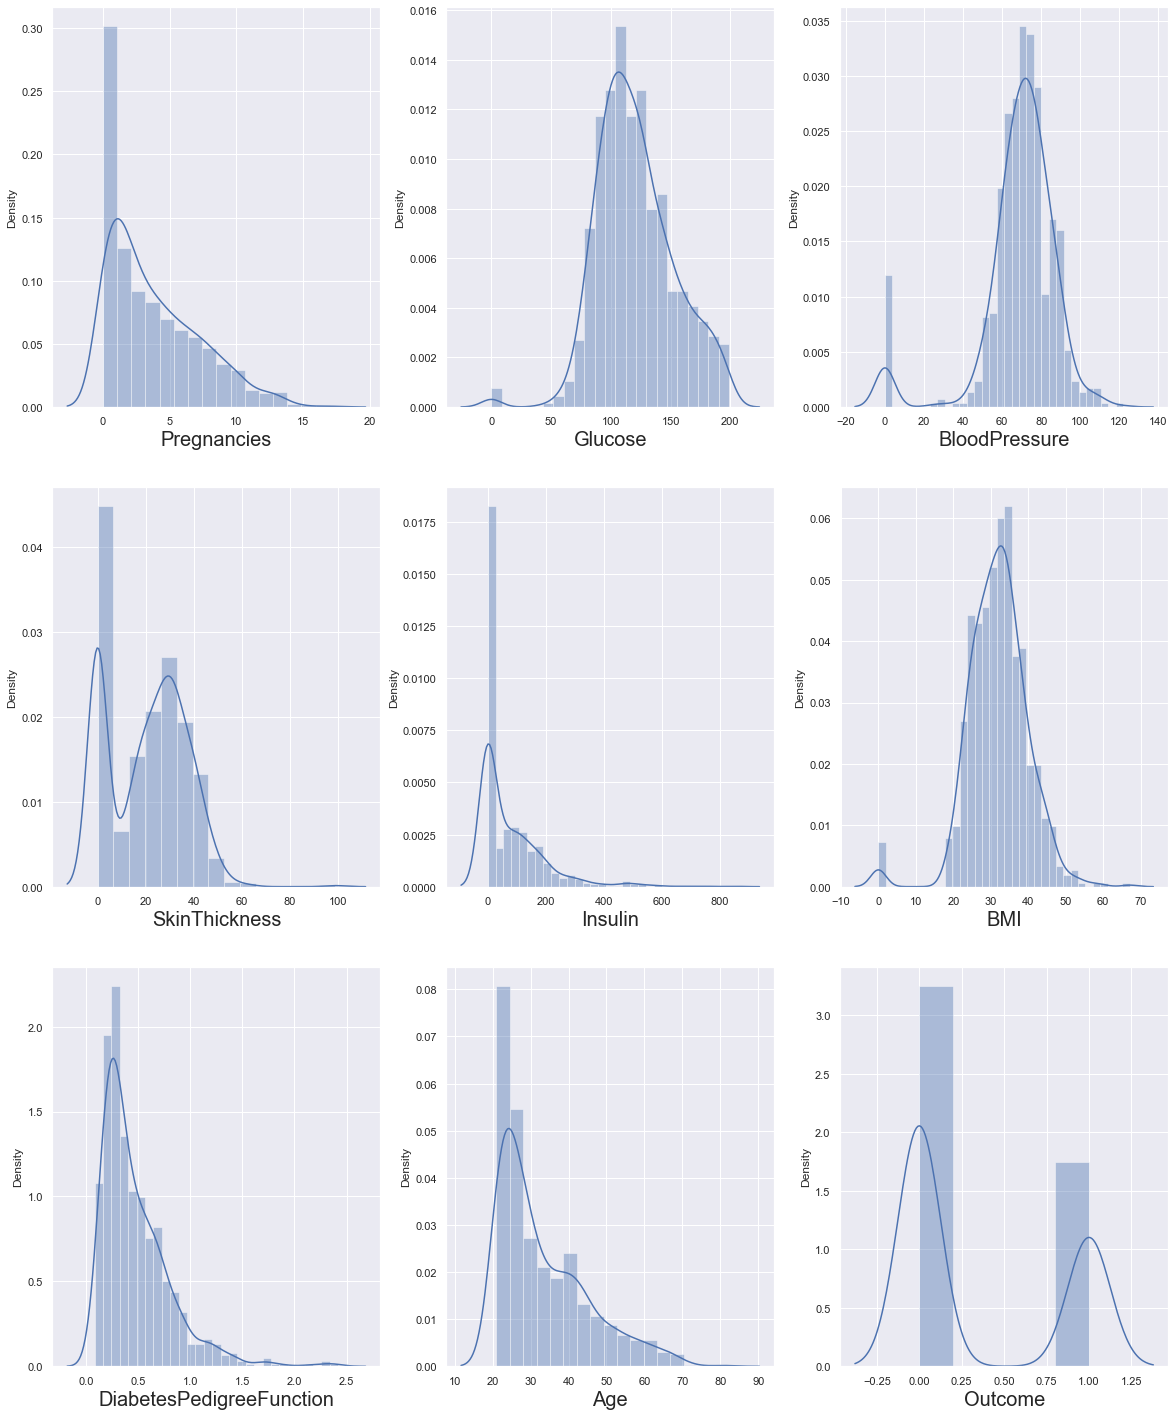

In [3]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [4]:
# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

C:\Users\shri\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shri\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shri\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

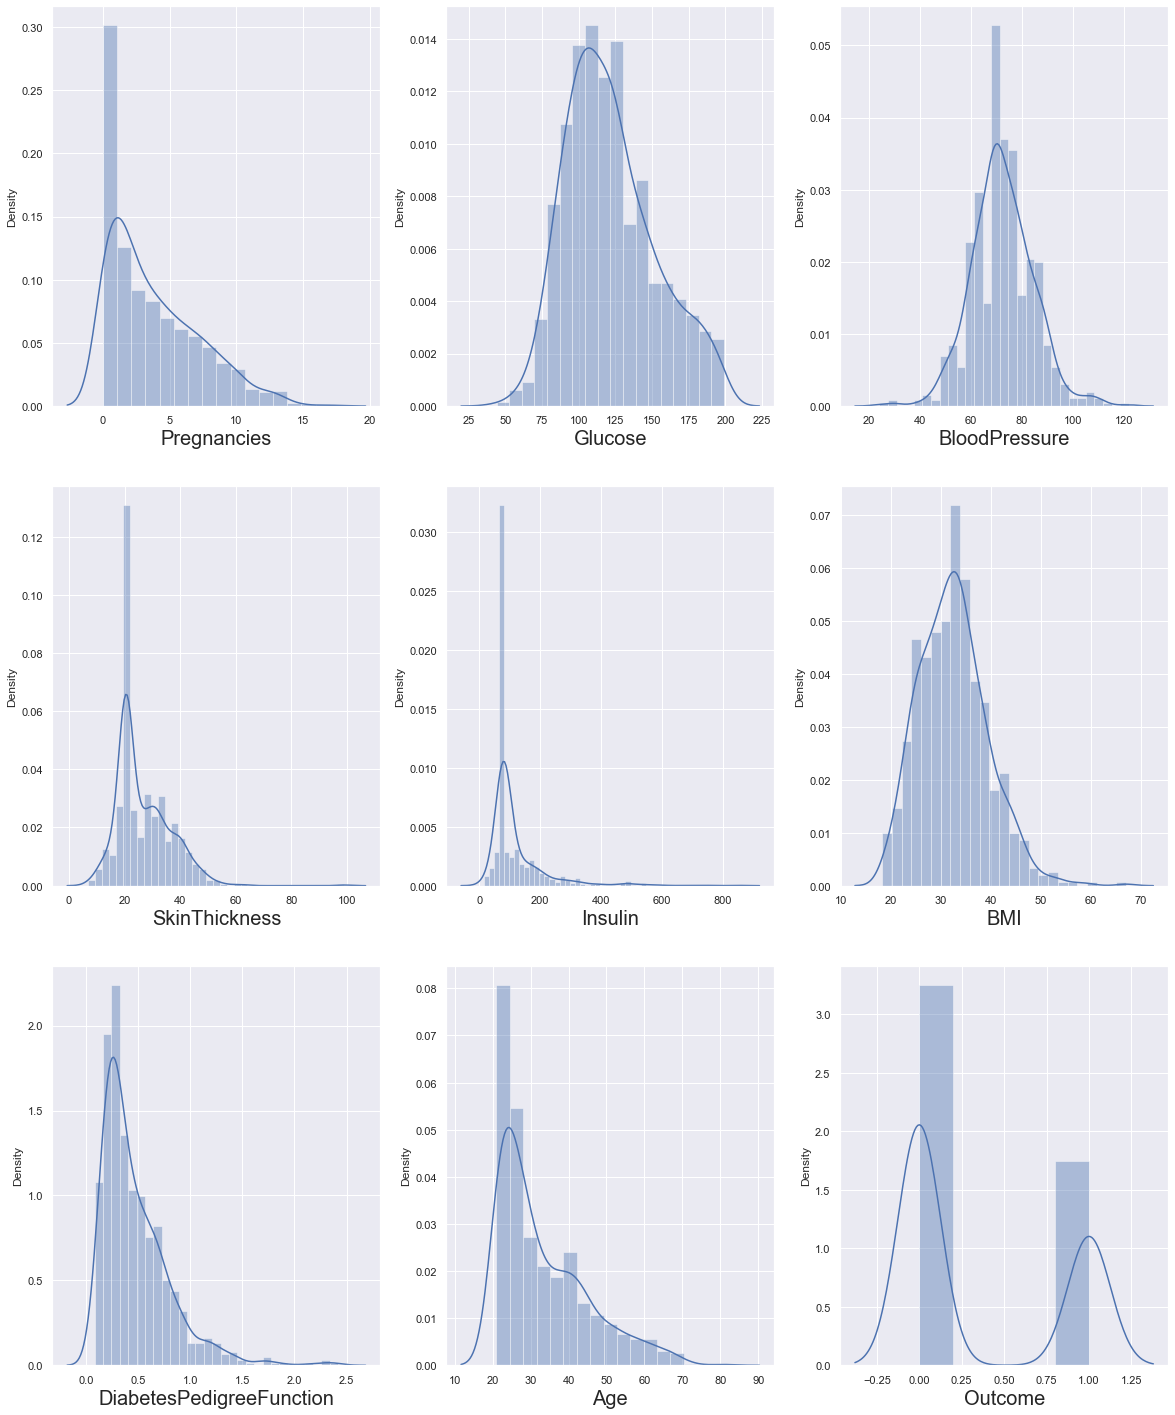

In [5]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

little skewness

In [6]:
X = data.drop(columns = ['Outcome']) #feat
y = data['Outcome']#target

In [7]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [8]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


<AxesSubplot:>

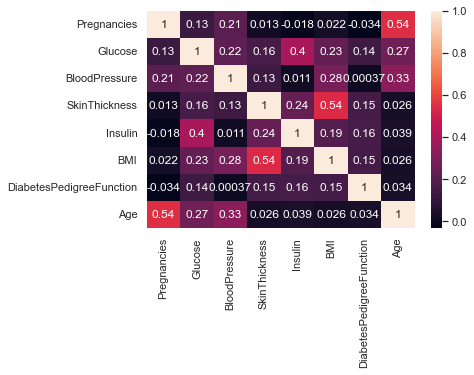

In [9]:
sns.heatmap(X.corr(),annot=True)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)# training & testing 

In [11]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [12]:
y_pred = log_reg.predict(x_test)

In [13]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7552083333333334

In [14]:
conf_mat = confusion_matrix(y_test,y_pred,labels=[1,0])
conf_mat

array([[ 35,  32],
       [ 15, 110]], dtype=int64)

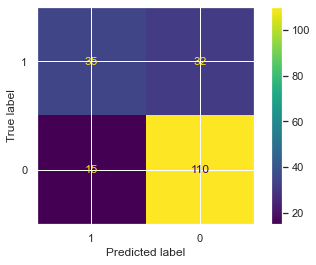

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,labels=[1,0])

In [16]:
true_positive = conf_mat[0][0]
false_negative = conf_mat[0][1]
false_positive = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [17]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7552083333333334

In [18]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.7

In [19]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.5223880597014925

In [21]:
f1=2*((Precision * Recall )) /(Precision + Recall)

In [22]:
f1

0.5982905982905983

In [23]:
from sklearn.metrics import  roc_curve, roc_auc_score

In [24]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7011940298507463

In [25]:
y_pred_prob = log_reg.predict_proba(x_test)

In [26]:
y_pred_prob

array([[0.81756706, 0.18243294],
       [0.71179737, 0.28820263],
       [0.68334273, 0.31665727],
       [0.70713341, 0.29286659],
       [0.90305982, 0.09694018],
       [0.69400266, 0.30599734],
       [0.82058445, 0.17941555],
       [0.82591547, 0.17408453],
       [0.58468526, 0.41531474],
       [0.54356631, 0.45643369],
       [0.8916768 , 0.1083232 ],
       [0.95488627, 0.04511373],
       [0.64347789, 0.35652211],
       [0.09878942, 0.90121058],
       [0.03852083, 0.96147917],
       [0.78308696, 0.21691304],
       [0.54426504, 0.45573496],
       [0.92928552, 0.07071448],
       [0.69117556, 0.30882444],
       [0.98861963, 0.01138037],
       [0.94038403, 0.05961597],
       [0.3147071 , 0.6852929 ],
       [0.67485477, 0.32514523],
       [0.96872502, 0.03127498],
       [0.6079026 , 0.3920974 ],
       [0.61976539, 0.38023461],
       [0.60370636, 0.39629364],
       [0.90033811, 0.09966189],
       [0.90061905, 0.09938095],
       [0.91135592, 0.08864408],
       [0.

In [27]:
y_pred_prob[:,1]

array([0.18243294, 0.28820263, 0.31665727, 0.29286659, 0.09694018,
       0.30599734, 0.17941555, 0.17408453, 0.41531474, 0.45643369,
       0.1083232 , 0.04511373, 0.35652211, 0.90121058, 0.96147917,
       0.21691304, 0.45573496, 0.07071448, 0.30882444, 0.01138037,
       0.05961597, 0.6852929 , 0.32514523, 0.03127498, 0.3920974 ,
       0.38023461, 0.39629364, 0.09966189, 0.09938095, 0.08864408,
       0.48279132, 0.63779319, 0.80566434, 0.23650662, 0.17488524,
       0.03657687, 0.3318217 , 0.06098156, 0.10907067, 0.03991381,
       0.17884847, 0.05673696, 0.26093581, 0.79360898, 0.28753245,
       0.08795856, 0.09044549, 0.05644278, 0.20120617, 0.41759495,
       0.17699279, 0.8547375 , 0.28297877, 0.20687856, 0.64632816,
       0.03049442, 0.45570124, 0.03431411, 0.89340146, 0.11896219,
       0.0640821 , 0.07360614, 0.65032846, 0.63392561, 0.66595895,
       0.72250595, 0.78771856, 0.08187299, 0.04096916, 0.25976883,
       0.13416676, 0.13371649, 0.86213891, 0.94488715, 0.44833

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [29]:
fpr

array([0.   , 0.   , 0.   , 0.008, 0.008, 0.016, 0.016, 0.024, 0.024,
       0.032, 0.032, 0.04 , 0.04 , 0.048, 0.048, 0.056, 0.056, 0.12 ,
       0.12 , 0.136, 0.136, 0.152, 0.152, 0.184, 0.184, 0.192, 0.192,
       0.2  , 0.2  , 0.208, 0.208, 0.224, 0.224, 0.24 , 0.24 , 0.248,
       0.248, 0.264, 0.264, 0.28 , 0.28 , 0.36 , 0.36 , 0.384, 0.384,
       0.392, 0.392, 0.424, 0.424, 0.456, 0.456, 0.472, 0.472, 0.512,
       0.512, 0.544, 0.544, 0.552, 0.552, 0.584, 0.584, 1.   ])

In [30]:
tpr

array([0.        , 0.01492537, 0.05970149, 0.05970149, 0.13432836,
       0.13432836, 0.20895522, 0.20895522, 0.31343284, 0.31343284,
       0.41791045, 0.41791045, 0.43283582, 0.43283582, 0.46268657,
       0.46268657, 0.49253731, 0.49253731, 0.52238806, 0.52238806,
       0.53731343, 0.53731343, 0.56716418, 0.56716418, 0.59701493,
       0.59701493, 0.62686567, 0.62686567, 0.65671642, 0.65671642,
       0.67164179, 0.67164179, 0.68656716, 0.68656716, 0.74626866,
       0.74626866, 0.76119403, 0.76119403, 0.7761194 , 0.7761194 ,
       0.82089552, 0.82089552, 0.8358209 , 0.8358209 , 0.86567164,
       0.86567164, 0.89552239, 0.89552239, 0.91044776, 0.91044776,
       0.92537313, 0.92537313, 0.94029851, 0.94029851, 0.95522388,
       0.95522388, 0.97014925, 0.97014925, 0.98507463, 0.98507463,
       1.        , 1.        ])

In [31]:
thresholds

array([1.97001323, 0.97001323, 0.94655025, 0.94488715, 0.88910549,
       0.87883478, 0.84877821, 0.84068088, 0.80033792, 0.79360898,
       0.74429205, 0.73650798, 0.72250595, 0.71389287, 0.6852929 ,
       0.66691247, 0.65032846, 0.54156225, 0.50937391, 0.47735389,
       0.46735188, 0.45573496, 0.45514152, 0.44442294, 0.42097563,
       0.41759495, 0.41531474, 0.41134591, 0.39629364, 0.3920974 ,
       0.38023461, 0.36993338, 0.36324363, 0.33493171, 0.32276161,
       0.31726304, 0.31665727, 0.30882444, 0.30599734, 0.28820263,
       0.27931929, 0.23731822, 0.23650662, 0.22621323, 0.22205675,
       0.21691304, 0.20687856, 0.18221585, 0.17941555, 0.17494034,
       0.17488524, 0.16922696, 0.16249473, 0.14967312, 0.14733869,
       0.13704198, 0.13416676, 0.13371649, 0.13130981, 0.10948988,
       0.10907067, 0.01138037])

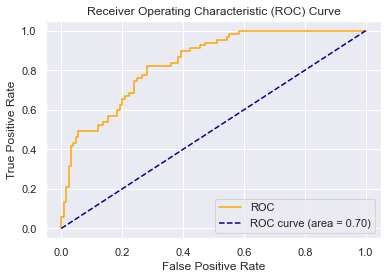

In [32]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

 create various models using different algorithms that we can use for classification purpose. We use AUC to determine which model is the best one to use for a given dataset. Suppose we have created Logistic regression, SVM  model for classification purpose. We will calculate AUC for all the models seperately. The model with highest AUC value will be the best model to use.

Advantages of Logisitic Regression
It is very simple and easy to implement.

It expresses the relationship between independent and dependent variables

Very effective with linearly seperable data

Disadvantages of Logisitic Regression

Not effective with data which are not linearly seperable

Not as powerful as other classification models

Multiclass classifications are much easier to do with other algorithms than logisitic regression
